In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from toolbox import wrappers
from IPython.display import IFrame, Image
import pandas as pd
import numpy as np
from scipy import stats

GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!


## Toy network by Guney et al

[Guney et al 2016 Nat Comm](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740350/) developed a network based method for in silico drug efficacy screening.  It quantifies the **proximity**, $z$, of a gene set to another gene set in the PPI network.

Definition of the closest proximity $d_c$ or just $d$ as
\begin{equation}
d(S, T) = \frac{1}{|T|}\sum_{t \in T} \min_{s \in S} d(s, t)
\end{equation}
where $S$ is the set of disease genes, $T$ the set of drug targets, $d(s,t)$ is the shortest path length between disease gene $s$ and drug target $t$.

Interpretation: the average length of shortest paths taken from all drug targets to the disease genes.

See [Fig 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740350/figure/f1/) of Guney et al for explanation.

Let's use the software tools developed by Emre Guney to calculate the proximity $z$-score between the orange genes and cyan genes!

Resources:
1. [Guney's repository](https://github.com/emreg00/toolbox)
1. [my clone of a clone](https://github.com/attilagk/guney_code)

In [3]:
file_name = "../../resources/proximity/data/toy.sif"
network = wrappers.get_network(file_name, only_lcc = True)
disgenes = ["B", "D", "E"] # disease genes

def toy_proximity(targets, disgenes=disgenes, network=network, min_bin_size = 2, seed=452456):
    d, z, (mean, sd) = wrappers.calculate_proximity(network, targets, disgenes, min_bin_size = min_bin_size, seed=seed)
    val = {'d': d, 'z': z, 'mean': mean, 'sd': sd}
    val['p'] = stats.norm.cdf(z)
    return(val)

### Drug targets distal to disease genes
One target (C) is at least one edge away while the other target (H) is at least two edges away from disease proteins

In [2]:
#IFrame("./toy.sif.pdf", width=600, height=600) # PDF alternative: doesn't work on GitHub?

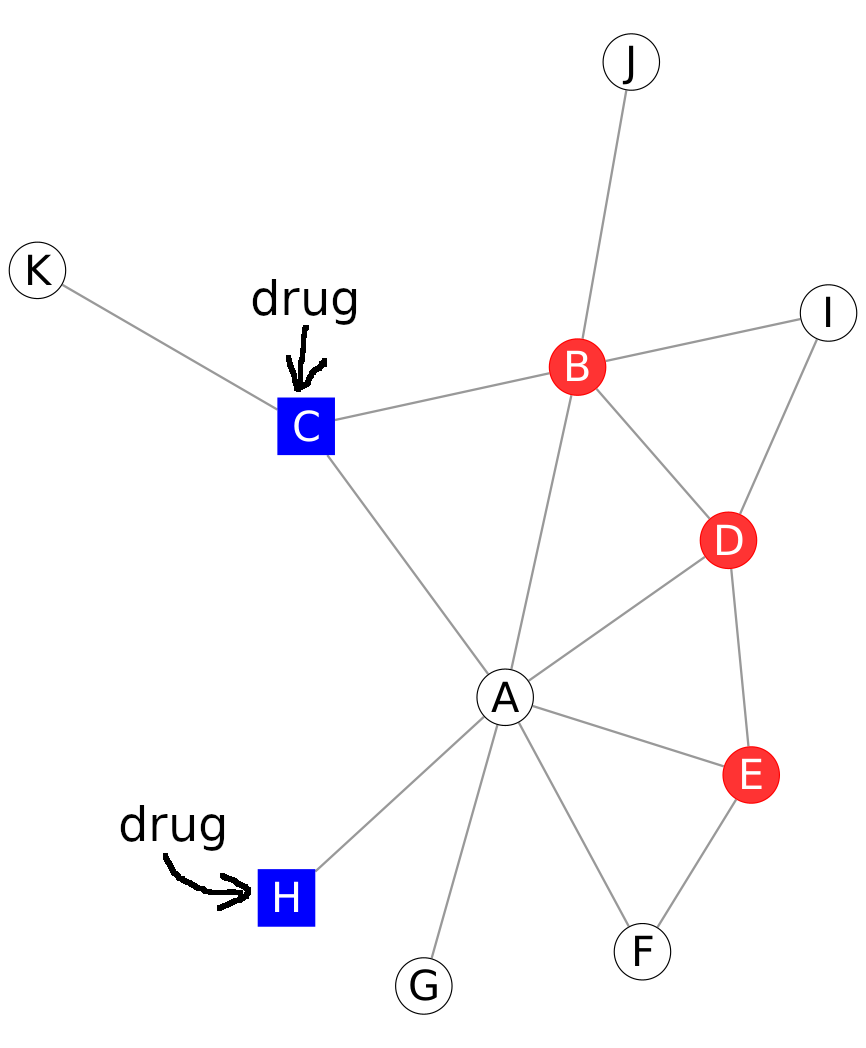

In [4]:
Image('../../results/2021-06-14-proximity/toy-distal-arrow.png', width=500)

In [5]:
targets1 = ["C", "H"]
res1 = toy_proximity(targets1)
res1

{'d': 1.5,
 'z': 2.217466970061473,
 'mean': 1.0845,
 'sd': 0.18737595897019446,
 'p': 0.9867044011350141}

### Drug targets proximal to disease genes
One target (E) is a disease protein while the other target (J) is one edge away from a disease protein.

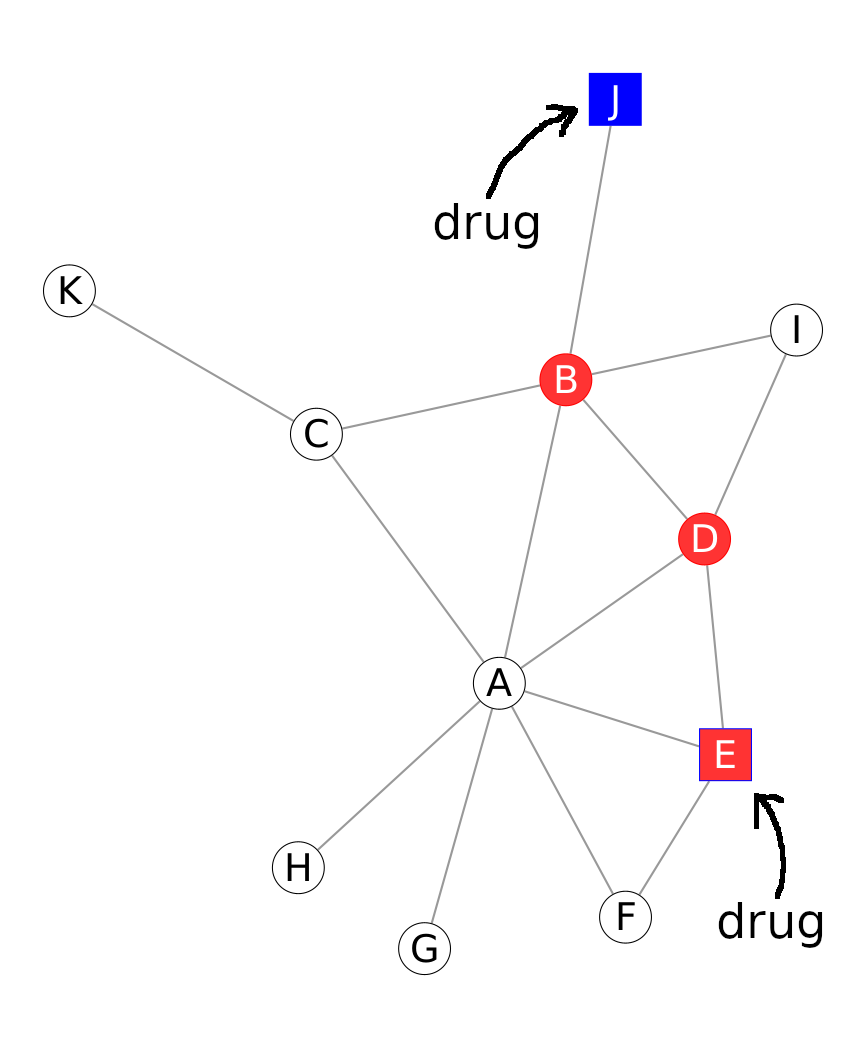

In [6]:
Image('../../results/2021-06-14-proximity/toy-proximal-arrow.png', width=500)

In [7]:
targets2 = ["E", "J"]
res2 = toy_proximity(targets2)
res2

{'d': 0.5,
 'z': -0.45417245360279207,
 'mean': 0.5855,
 'sd': 0.18825448201835726,
 'p': 0.3248523539627196}

### Even more proximal

Now both drug targets are also disease proteins

In [8]:
targets3 = ["E", "D"]
res3 = toy_proximity(targets3)
res3

{'d': 0.0,
 'z': -0.5989120571285179,
 'mean': 0.132,
 'sd': 0.22039963702329457,
 'p': 0.2746157653589515}

## AD genes

The DISEASES database contains 3 sets of [AD genes](https://diseases.jensenlab.org/Entity?order=textmining,knowledge,experiments&textmining=10&knowledge=10&experiments=10&type1=-26&type2=9606&id1=DOID:10652):
* Text mining
* Knowledge
* Experiments

### Text mining

|  | network A (left) | network B (right) |
| --- | --- | --- |
| top AD genes | 100 | 50 |
| edge confidence | 0.4 | 0.7 |
| edges | 1230 | 143 |

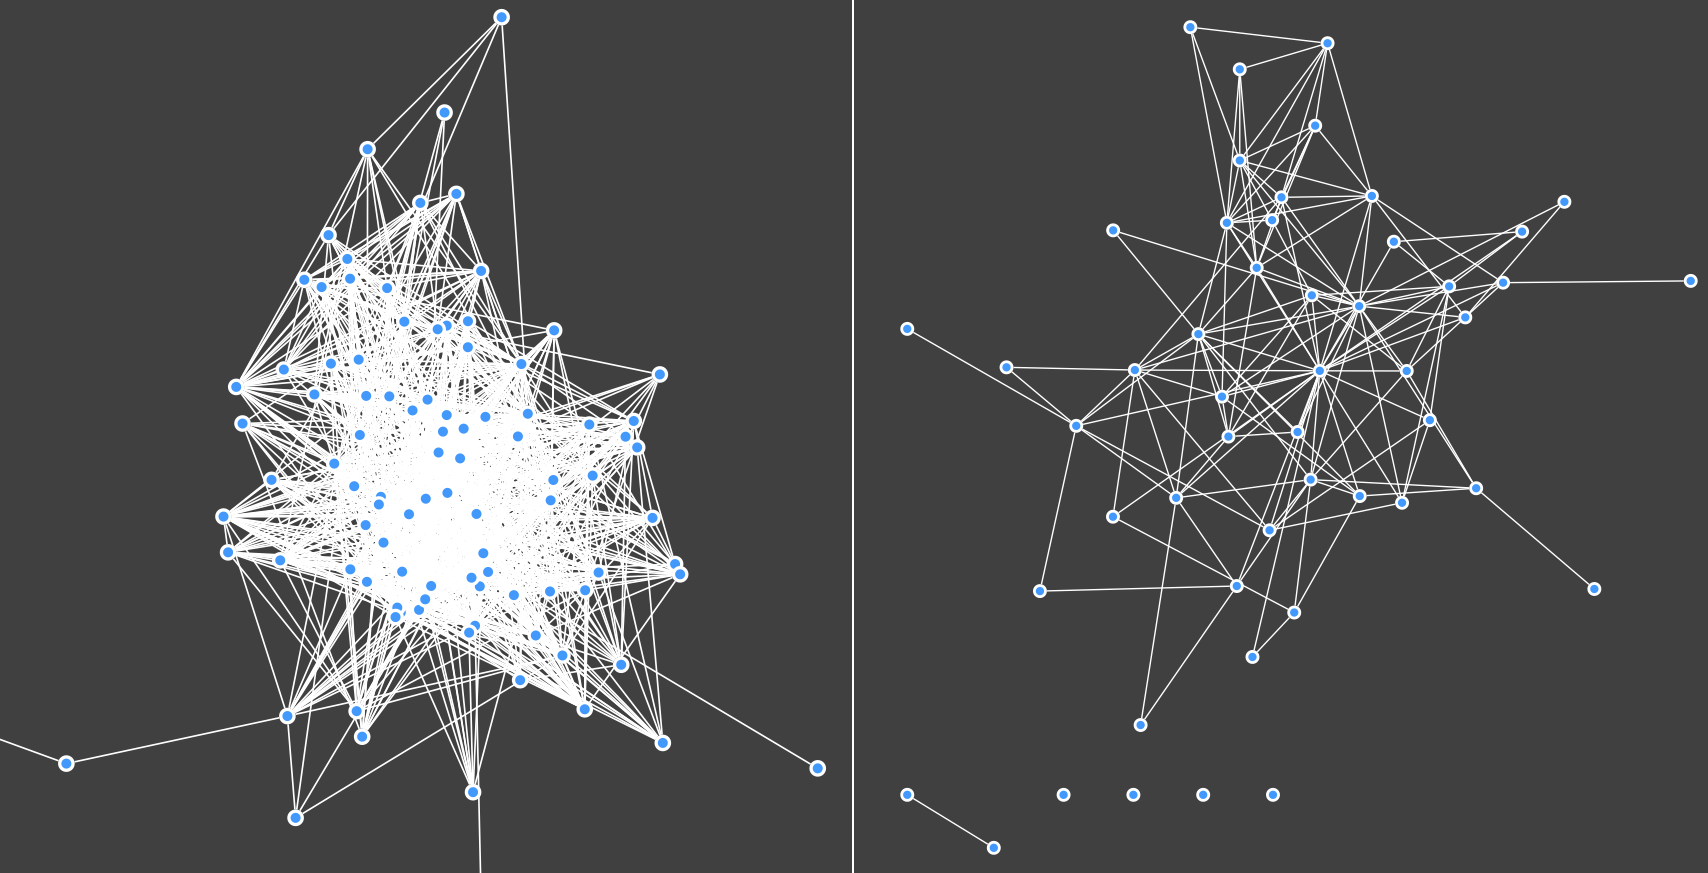

In [9]:
Image('./AD-DISEASES-dark.png', width=800)

Network B and it's proteins

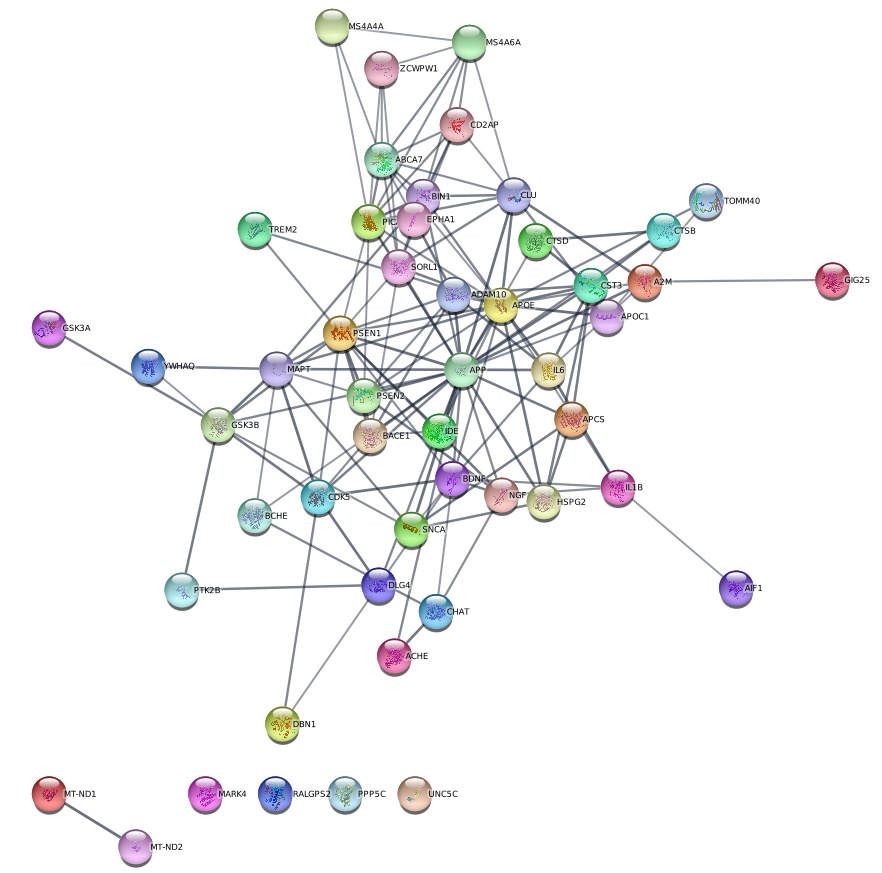

In [10]:
Image('./AD-DISEASES-0.7conf-50genes.png', width=800)

### Knowledge

In [11]:
colnames = ['ensembl ID', 'symbol', 'DOID', 'disease', 'source', 'evidence', 'confidence']
knowledge = pd.read_csv('../../resources/DISEASES/human_disease_knowledge_filtered.tsv', sep='\t', header=None, names=colnames)
knowledge = knowledge.loc[knowledge['disease'] == "Alzheimer's disease"]
knowledge = knowledge.sort_values(by='confidence', axis=0, ascending=False)
knowledge

,ensembl ID,symbol,DOID,disease,source,evidence,confidence
4282,ENSP00000355747,PSEN2,DOID:10652,Alzheimer's disease,GHR,CURATED,5
771,ENSP00000252486,APOE,DOID:10652,Alzheimer's disease,GHR,CURATED,5
1923,ENSP00000284981,APP,DOID:10652,Alzheimer's disease,GHR,CURATED,5
3050,ENSP00000326366,PSEN1,DOID:10652,Alzheimer's disease,GHR,CURATED,5
4220,ENSP00000355046,MT-ND2,DOID:10652,Alzheimer's disease,UniProtKB-KW,CURATED,4
3394,ENSP00000338345,SNCA,DOID:10652,Alzheimer's disease,UniProtKB-KW,CURATED,4
3497,ENSP00000340820,MAPT,DOID:10652,Alzheimer's disease,AmyCo,CURATED,4
3498,ENSP00000340820,MAPT,DOID:10652,Alzheimer's disease,UniProtKB-KW,CURATED,4
3660,ENSP00000345672,CTSB,DOID:10652,Alzheimer's disease,AmyCo,CURATED,4
4152,ENSP00000354687,MT-ND1,DOID:10652,Alzheimer's disease,UniProtKB-KW,CURATED,4


In [12]:
AD_genes_knowledge = set(knowledge.symbol)
repr(AD_genes_knowledge)

"{'APOE', 'PPP5C', 'CLU', 'GSK3A', 'CTSD', 'APP', 'MAPT', 'A2M', 'PSEN1', 'SNCA', 'GIG25', 'RALGPS2', 'ABCA7', 'CTSB', 'PSEN2', 'APCS', 'ADAM10', 'SORL1', 'IL6', 'GSK3B', 'DBN1', 'CST3', 'MT-ND2', 'UNC5C', 'MT-ND1', 'HSPG2'}"

Now load

In [13]:
%connect_info

{
  "shell_port": 48115,
  "iopub_port": 38171,
  "stdin_port": 52963,
  "control_port": 48815,
  "hb_port": 34755,
  "ip": "127.0.0.1",
  "key": "e087d29d-33565ecfe143a07c6fadf5fc",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-37512d0f-8689-43b7-8a99-e988c9f0deb6.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
